In [1]:
import pandas as pd
import numpy as np
import math


In [6]:
pip install yahoo_fin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 4.0 MB/s 
     |████████████████████████████████| 83 kB 1.9 MB/s 
     |████████████████████████████████| 112 kB 53.0 MB/s 
     |████████████████████████████████| 127 kB 51.7 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=986981a86c42ae5dcd309d0ea8e1170621a860c7f39971f9558ed9fa82d30e0c
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=332372e31f8c55cca8911b8e5268a98bf6a818f0627cd67490f4cbbe787707db
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=5562d1c91b199c730fc317676ed730e9f59edd5c02d039d8edd0a

In [2]:
from datetime import date
from matplotlib import pyplot as plt
import datetime as dt
from matplotlib import dates

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras import layers

In [47]:
from yahoo_fin.stock_info import get_data

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

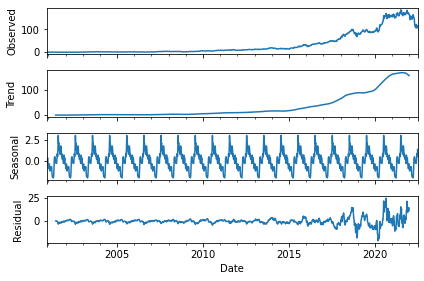

In [52]:
results = seasonal_decompose(df['close'])
results.plot();

In [54]:
amzn2000_2020= get_data("amzn", start_date="12/04/2000", end_date="01/31/2020", index_as_date = True, interval="1wk")
amzn2000_2020

,open,high,low,close,adjclose,volume,ticker
2000-12-04,1.259375,1.381250,1.006250,1.171875,1.171875,1013370000,AMZN
2000-12-11,1.143750,1.375000,1.087500,1.143750,1.143750,804546000,AMZN
2000-12-18,1.037500,1.059375,0.743750,0.778125,0.778125,1390856000,AMZN
2000-12-25,0.815625,0.925000,0.750000,0.778125,0.778125,678338000,AMZN
2001-01-01,0.790625,0.893750,0.678125,0.728125,0.728125,866064000,AMZN
...,...,...,...,...,...,...,...
2019-12-30,93.699997,94.900497,91.611504,93.748497,93.748497,279492000,AMZN
2020-01-06,93.000000,95.890999,93.000000,94.157997,94.157997,352714000,AMZN
2020-01-13,94.565498,94.900002,92.754501,93.236000,93.236000,315502000,AMZN
2020-01-20,93.250000,95.125000,92.372002,93.082001,93.082001,263498000,AMZN


In [55]:
amzn2020_2022= get_data("amzn", start_date="02/01/2020", end_date="07/04/2022", index_as_date = True, interval="1wk")
amzn2020_2022

,open,high,low,close,adjclose,volume,ticker
2020-01-27,102.573502,102.786003,100.113503,100.435997,100.435997,311346000,AMZN
2020-02-03,100.529999,104.926498,100.012497,103.963997,103.963997,476710000,AMZN
2020-02-10,104.250504,109.297501,104.248001,106.743500,106.743500,395490000,AMZN
2020-02-17,106.250999,109.254997,104.400002,104.798500,104.798500,265688000,AMZN
2020-02-24,100.158997,101.964996,90.556503,94.187500,94.187500,712314000,AMZN
...,...,...,...,...,...,...,...
2022-05-30,116.279999,125.610001,115.675003,122.349998,122.349998,470326000,AMZN
2022-06-06,125.250000,128.990005,109.050003,109.650002,109.650002,439648100,AMZN
2022-06-13,104.190002,109.059998,101.430000,106.220001,106.220001,435976000,AMZN
2022-06-20,108.199997,116.709999,103.559998,116.459999,116.459999,265154200,AMZN


In [9]:
amzn_weekly.index.name = 'Date'

In [10]:
df= pd.DataFrame(amzn_weekly)
df.head()

,open,high,low,close,adjclose,volume,ticker
Date,,,,,,,
2000-12-04,1.259375,1.381250,1.006250,1.171875,1.171875,1013370000,AMZN
2000-12-11,1.143750,1.375000,1.087500,1.143750,1.143750,804546000,AMZN
2000-12-18,1.037500,1.059375,0.743750,0.778125,0.778125,1390856000,AMZN
2000-12-25,0.815625,0.925000,0.750000,0.778125,0.778125,678338000,AMZN
2001-01-01,0.790625,0.893750,0.678125,0.728125,0.728125,866064000,AMZN


In [11]:
df.isna().sum()

open        0
high        0
low         0
close       0
adjclose    0
volume      0
ticker      0
dtype: int64

In [12]:
df.describe()

,open,high,low,close,adjclose,volume
count,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1.126000e+03
mean,33.684492,34.781774,32.712622,33.786523,33.786523,5.961539e+08
std,48.900815,50.486683,47.466602,48.957863,48.957863,3.761248e+08
min,0.295500,0.383000,0.275500,0.298500,0.298500,1.166720e+08
25%,2.210125,2.314875,2.112875,2.221875,2.221875,3.459635e+08
50%,9.561000,9.844750,9.257750,9.639500,9.639500,5.123050e+08
75%,41.762500,42.335375,41.335752,41.945001,41.945001,7.336650e+08
max,187.199997,188.654007,178.522995,185.966995,185.966995,4.884366e+09


In [13]:
df = df.sort_values('Date')

Text(0.5, 1.0, ' AMZN Stock Plot for Overall Period')

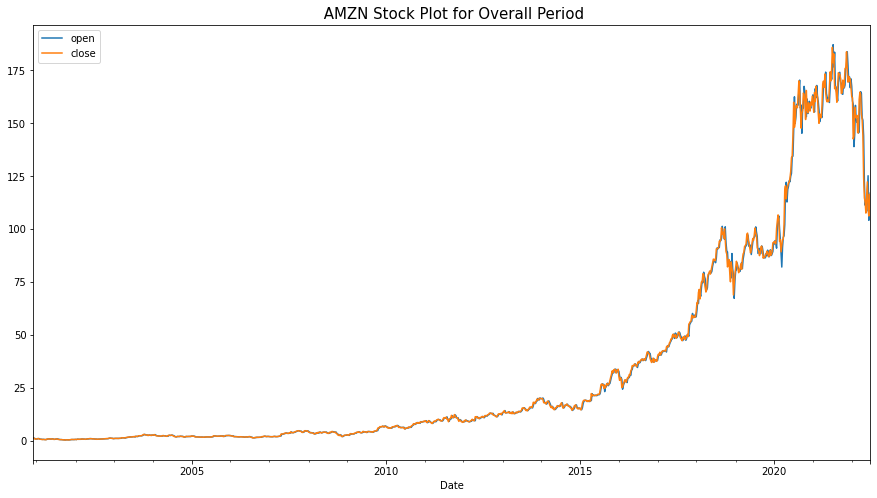

In [18]:
df[['open','close',]].plot(figsize=(15,8))
plt.title(" AMZN Stock Plot for Overall Period", fontsize=15)

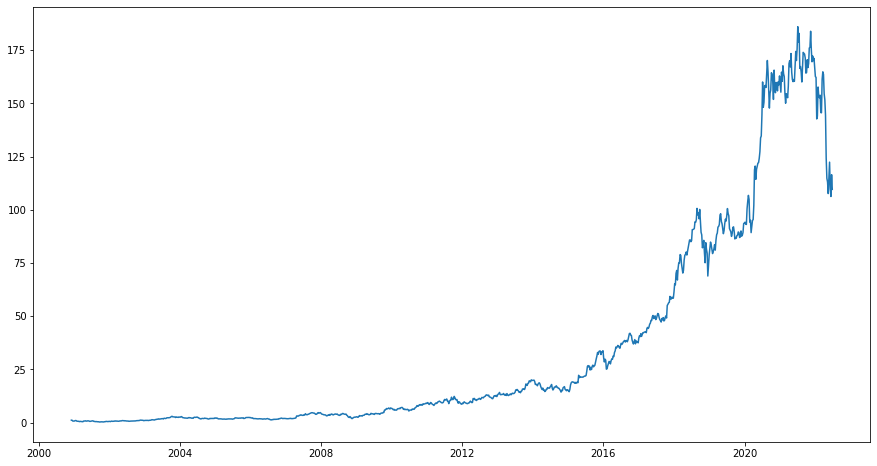

In [17]:
plt.figure(figsize=(15, 8))
plt.plot(df['close'])



In [19]:
close_prices = df['close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [20]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [21]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=10)

Epoch 1/10
841/841 [==============================] - 35s 34ms/step - loss: 4.9623e-05
Epoch 2/10
841/841 [==============================] - 29s 34ms/step - loss: 5.0050e-05
Epoch 3/10
841/841 [==============================] - 29s 35ms/step - loss: 6.7143e-05
Epoch 4/10
841/841 [==============================] - 29s 35ms/step - loss: 5.8774e-05
Epoch 5/10
841/841 [==============================] - 30s 35ms/step - loss: 6.1379e-05
Epoch 6/10
841/841 [==============================] - 29s 34ms/step - loss: 4.3869e-05
Epoch 7/10
841/841 [==============================] - 29s 34ms/step - loss: 4.6748e-05
Epoch 8/10
841/841 [==============================] - 29s 34ms/step - loss: 3.9028e-05
Epoch 9/10
841/841 [==============================] - 30s 35ms/step - loss: 4.0642e-05
Epoch 10/10
841/841 [==============================] - 30s 36ms/step - loss: 4.7007e-05


In [56]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


NameError: ignored

In [40]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

7.893470594618056

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


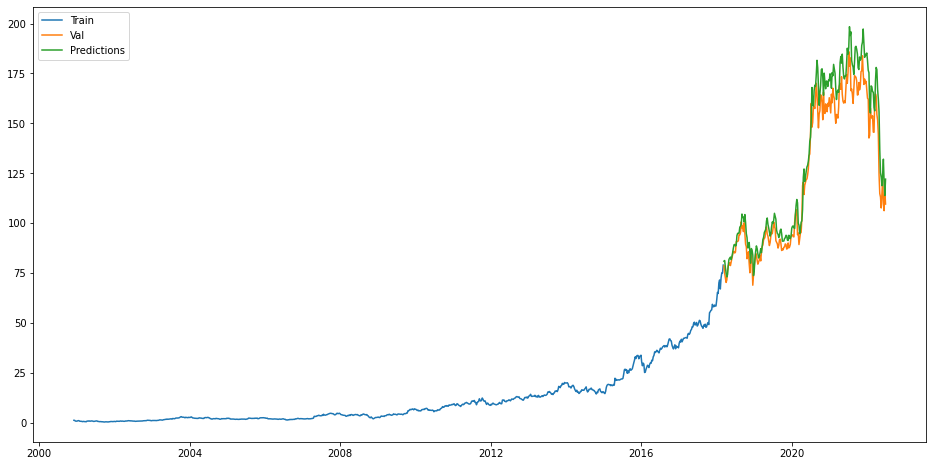

In [44]:
data = df.filter(['close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.plot(train)
plt.plot(validation[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'])

plt.show()